In [17]:
import pandas as pd
import numpy as np

from pandas import DataFrame

import seaborn as sns

In [2]:
NBC = pd.read_csv('/Users/Behnoush/Desktop/NBC/NBC.csv')
NBC.columns

Index(['MOIS', 'CLIENT_ID', 'pret_anterieur', 'compte_commercial', 'carte_MC',
       'NSF', 'PH_autre_FI', 'sphere_epargne', 'sphere_financement',
       'sphere_transaction', 'nb_produit', 'relation_BNC', 'vol_MC',
       'vol_epargne', 'vol_financement', 'vol_transaction', 'TEF',
       'mono_produit', 'PH'],
      dtype='object')

In [3]:
DEMO = pd.read_csv('/Users/Behnoush/Desktop/NBC/DEMO.csv')
DEMO.columns

Index(['MOIS', 'CLIENT_ID', 'homme', 'courriel', 'Langue_Francais',
       'naissance', 'logement', 'profession', 'nb_enfant', 'ville',
       'education', 'age', 'revenu', 'revenu_foyer'],
      dtype='object')

In [4]:
data = pd.merge(NBC, DEMO,
                on = ['CLIENT_ID', 'MOIS'], 
                how = 'left')

# data.head()
# data.describe()
# data.dtypes

## Exploratory data analysis

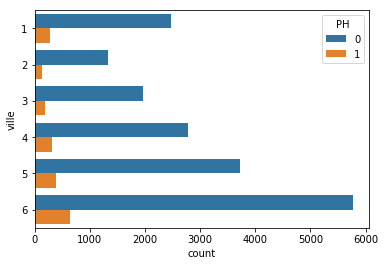

In [5]:
sns.countplot(y = 'ville', hue = 'PH', data = data)

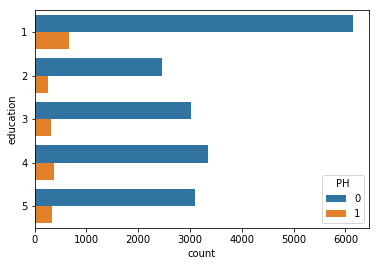

In [6]:
# sns.countplot(y = 'profession', hue = 'PH', data = data)
sns.countplot(y = 'education', hue = 'PH', data = data)

## Preprocessing variables

In [7]:
# Make values of categorical variables to dummy values

profession = data['profession'].map({1: 'professionel', 
                                   2: 'Manager', 
                                   3: 'Col_bleu', 
                                   4: 'Col_blanc', 
                                   5: 'Retraite', 
                                   6: 'Sans_travail'})

profession = pd.get_dummies(profession)
#print(profession.head(10))

data = pd.concat([data,profession], axis=1)
# data.columns

education = data['education'].map({1: 'secondaire', 
                                   2: 'CEGEP', 
                                   3: 'BAC', 
                                   4: 'Msc', 
                                   5: 'PhD'})

education = pd.get_dummies(education)

data = pd.concat([data,education], axis=1)


ville = data['ville'].map({1: 'Outaouais', 
                           2: 'Estrie', 
                           3: 'Rive_Sud', 
                           4: 'Rive_Nord', 
                           5: 'Quebec', 
                           6: 'Montreal'})

ville = pd.get_dummies(ville)

data = pd.concat([data,ville], axis=1)


In [8]:
data.columns

Index(['MOIS', 'CLIENT_ID', 'pret_anterieur', 'compte_commercial', 'carte_MC',
       'NSF', 'PH_autre_FI', 'sphere_epargne', 'sphere_financement',
       'sphere_transaction', 'nb_produit', 'relation_BNC', 'vol_MC',
       'vol_epargne', 'vol_financement', 'vol_transaction', 'TEF',
       'mono_produit', 'PH', 'homme', 'courriel', 'Langue_Francais',
       'naissance', 'logement', 'profession', 'nb_enfant', 'ville',
       'education', 'age', 'revenu', 'revenu_foyer', 'Col_blanc', 'Col_bleu',
       'Manager', 'Retraite', 'Sans_travail', 'professionel', 'BAC', 'CEGEP',
       'Msc', 'PhD', 'secondaire', 'Estrie', 'Montreal', 'Outaouais', 'Quebec',
       'Rive_Nord', 'Rive_Sud'],
      dtype='object')

In [254]:
# Define interval for age 
# Leave for later (Better result?...)

In [9]:
# data['PH'].nunique()
data['PH'].unique()

data['PH'].value_counts()
# 10.8% of the sample is 1s - It is a moderate imbalanced dataset
# SMOTE is a famous approach to balance the sample, but the disadvantages of this approach is 
# more than advantages.... 

0    18056
1     1944
Name: PH, dtype: int64

In [10]:
# 'carte_MC', 'sphere_epargne', 'sphere_financement', 'sphere_transaction', 
# The above variables are defined by the vol of each account...No need to include!
# correaltion matrix also confirms this. 

# data.head(10)
df = data[['pret_anterieur', 'compte_commercial', 'NSF', 'PH_autre_FI', 
           'nb_produit', 'relation_BNC', 
           'vol_MC', 'vol_epargne', 'vol_financement', 'vol_transaction', 'TEF', 'mono_produit', 
           'homme', 'Langue_Francais','naissance', 'logement', 
           'nb_enfant','age', 'revenu', 'revenu_foyer', 
           'Col_blanc', 'Col_bleu', 'Manager', 'Retraite', 'Sans_travail', 'professionel',
           'BAC', 'CEGEP', 'Msc', 'PhD', 'secondaire', 
           'Estrie', 'Montreal', 'Outaouais', 'Quebec', 'Rive_Nord', 'Rive_Sud',
           'PH']]

df.describe(percentiles=[.25, .5, .75, .9, .95, .99, .995]).T
# data['PH'].unique().count()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.5%,max
pret_anterieur,20000.0,0.093700,0.367868,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,9.0
compte_commercial,20000.0,0.243500,0.429205,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0
NSF,20000.0,0.052450,0.222938,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,1.0
PH_autre_FI,20000.0,0.351300,0.477388,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0
nb_produit,20000.0,1.780900,0.885570,0.0,1.0,2.0,2.0,3.0,3.0,4.0,5.00,12.0
relation_BNC,20000.0,10.113550,5.845730,0.0,7.0,10.0,13.0,16.0,18.0,22.0,23.00,129.0
vol_MC,7943.0,20745.708171,10171.688870,6180.0,17325.0,20040.0,22740.0,25118.0,26620.0,29465.8,130413.50,135050.0
vol_epargne,7028.0,151364.257257,69015.572231,1000.0,116000.0,149000.0,183000.0,213000.0,231000.0,271730.0,282460.00,1356000.0
vol_financement,5082.0,513603.502558,315204.869620,10000.0,397000.0,497000.0,597000.0,692000.0,746000.0,853760.0,894595.00,5023000.0
vol_transaction,18974.0,2018.501107,1092.411465,100.0,1320.0,2000.0,2670.0,3250.0,3620.0,4282.7,4551.35,16050.0


In [11]:
data['compte_commercial'].value_counts()

0    15130
1     4870
Name: compte_commercial, dtype: int64

In [12]:
# Removing 0.5% as outlier 

Q1 = df.quantile(.005)
Q3 = df.quantile(.995)
IQR = Q3 - Q1
# print(Q1)
# print(Q3)

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# Removing wrong values
# There is a red flag for age, nb_enfant and homme 

print('initial data size: ', len(data))
check_df1 = df[df['homme']>1]
print('# outlier for homme dummy:', check_df1['homme'].count())
df = df[df['homme']<2]
print('data size: ', len(df))

df['nb_enfant'].value_counts()
check_df2 = df[df['nb_enfant']==99]
# check_df2.head()
print('# outlier for nb_enfant:', check_df2['nb_enfant'].count())
df = df[df['nb_enfant'] != 99]
print('data size: ', len(df))

df['age'].value_counts()
check_df3 = df[df['age']>101]
check_df3['age'].value_counts()
print('# outlier for age:', check_df3['age'].count())
df = df[df['age']<102]
print('data size: ', len(df))

df['pret_anterieur'].value_counts()
check_df4 = df[df['pret_anterieur']>1]
check_df4['pret_anterieur'].value_counts()
print('# outlier for pret_anterieur:', check_df4['pret_anterieur'].count())
df = df[df['pret_anterieur']<2]
print('data size: ', len(df))

initial data size:  20000
# outlier for homme dummy: 0
data size:  19855
# outlier for nb_enfant: 0
data size:  19855
# outlier for age: 413
data size:  19442
# outlier for pret_anterieur: 0
data size:  19442


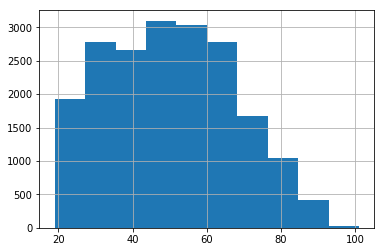

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df['age'].hist(bins=10)

In [16]:
df['PH'].unique()

df['PH'].value_counts()

0    17595
1     1847
Name: PH, dtype: int64

In [418]:
### Does not change the story...

# Create logarithm of continous variables
# cols = ['vol_MC', 'vol_epargne', 'vol_financement', 'vol_transaction', 
#         'age', 'revenu', 'revenu_foyer'] 

# for i in cols:
    
#     df['log_' + str(i)] = np.log(df[i]+1)
    
    
#df.head()
# df.describe(percentiles=[.25, .5, .75, .9, .95, .99, .995, .999]).T

In [18]:
df.isnull().sum()
df = df.fillna(0)

# replace null values with 0

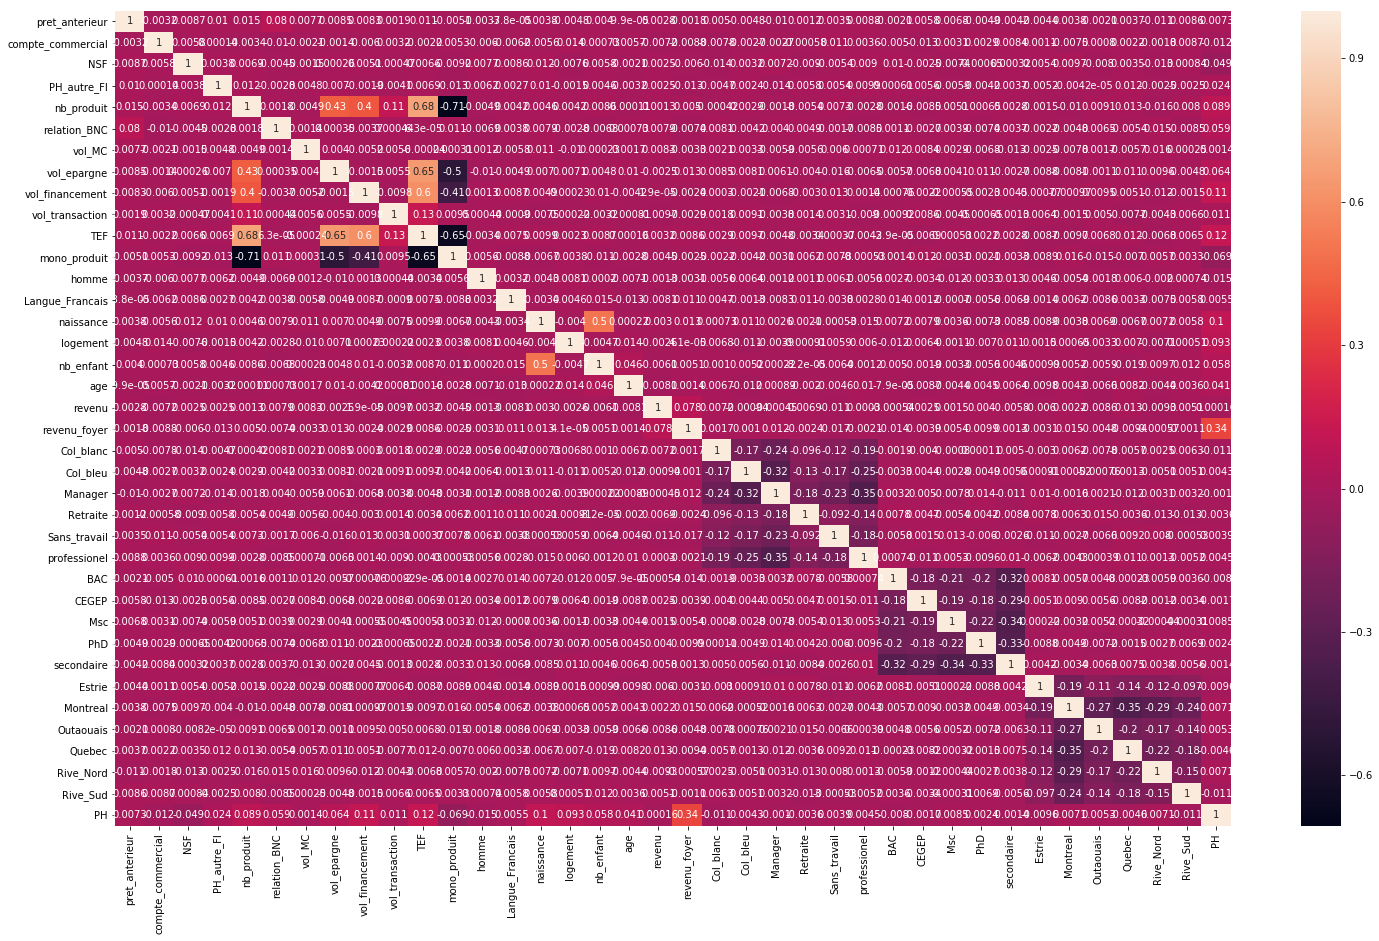

In [20]:
df = df.fillna(0)

# Correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (25,15))
sns.heatmap(df.corr(), annot=True )

# check without created dummy variables

# df_corr = df.drop(['Col_blanc', 'Col_bleu', 'Manager', 'Retraite', 'Sans_travail', 'professionel',
#                    'BAC', 'CEGEP', 'Msc', 'PhD', 'secondaire', 
#                    'Estrie', 'Montreal', 'Outaouais', 'Quebec', 'Rive_Nord', 'Rive_Sud'], axis=1)
# plt.figure(figsize = (25,15))
# sns.heatmap(df_corr.corr(), annot=True )

# Checking correlations 
a = df_corr.corr()
idx = a.columns
a = a.set_index(idx)
a.to_csv('a.csv')

In [71]:
# Use log of them instead of main variables
# , 'vol_MC', 'vol_epargne', 'vol_financement', 'vol_transaction', 
# 'age', 'revenu', 'revenu_foyer', 'Estrie','Montreal', 'Outaouais', 'Quebec', 'Rive_Nord', 'Rive_Sud'

df_data = df.drop(['mono_produit','TEF'
                  ], axis=1)

# df_data = df.drop(['nb_produit'
#                    ], axis=1)

# mono_produit and TEF can be dropped.
# will keep at the moment and will decide later! 

In [72]:
df_data.columns

Index(['pret_anterieur', 'compte_commercial', 'NSF', 'PH_autre_FI',
       'nb_produit', 'relation_BNC', 'vol_MC', 'vol_epargne',
       'vol_financement', 'vol_transaction', 'homme', 'Langue_Francais',
       'naissance', 'logement', 'nb_enfant', 'age', 'revenu', 'revenu_foyer',
       'Col_blanc', 'Col_bleu', 'Manager', 'Retraite', 'Sans_travail',
       'professionel', 'BAC', 'CEGEP', 'Msc', 'PhD', 'secondaire', 'Estrie',
       'Montreal', 'Outaouais', 'Quebec', 'Rive_Nord', 'Rive_Sud', 'PH'],
      dtype='object')

## Simple Logestic regression

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix

X = df_data.drop(['PH', 'secondaire', 'Retraite', 'Estrie'], axis = 1)

Y = df_data['PH']

X_tr, X_te, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [74]:
# Do feature scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_te)

In [75]:
Model = LogisticRegression()
Model.fit(X_train, y_train)
pred = Model.predict(X_test)


col = pd.DataFrame(X.columns, columns = ['variable'])

coef = pd.DataFrame(Model.coef_).T

coefficients = pd.concat([col, coef], axis=1).rename(columns = {0: 'Coefficients'})
print(coefficients)

confusion_matrix = confusion_matrix(y_test, pred)
print('\n Confusion Matrix: \n', confusion_matrix)

from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report


fpr, tpr, thresholds = roc_curve(y_test, pred)
roc = roc_auc_score(y_test, pred)
print('\n Area under ROC curve:', roc)
# print(classification_report(y_test, pred))

             variable  Coefficients
0      pret_anterieur      0.049514
1   compte_commercial     -0.049599
2                 NSF     -1.204269
3         PH_autre_FI      0.189254
4          nb_produit      1.121666
5        relation_BNC      1.149366
6              vol_MC      0.127980
7         vol_epargne      0.739849
8     vol_financement      1.381546
9     vol_transaction     -0.037599
10              homme     -0.197882
11    Langue_Francais      0.031835
12          naissance      0.808619
13           logement      0.714750
14          nb_enfant     -0.001145
15                age      0.754434
16             revenu     -0.230800
17       revenu_foyer      5.693504
18          Col_blanc     -0.324391
19           Col_bleu     -0.167108
20            Manager     -0.175678
21       Sans_travail     -0.123019
22       professionel     -0.072610
23                BAC     -0.040497
24              CEGEP     -0.056504
25                Msc     -0.011058
26                PhD     -0

## Using Logistic L1 (Lasso)
### Do feature reduction

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix

X = df_data.drop(['PH', 'secondaire', 'Retraite', 'Estrie'], axis = 1)

Y = df_data['PH']

X_tr, X_te, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

# Do feature scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_te)

In [77]:
C_values = [.1, .5, 1, 5, 10]  

for i in C_values: 
    
    sel_l1 = SelectFromModel(LogisticRegression(C=i, penalty='l1'))
    sel_l1.fit(X_train, y_train)

    selected_feat = X_tr.columns[(sel_l1.get_support())]
    print('\n C panalty is: ', i)
    print('Selected variables: \n', selected_feat)

    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(
          np.sum(sel_l1.estimator_.coef_ == 0)))


 C panalty is:  0.1
Selected variables: 
 Index(['NSF', 'PH_autre_FI', 'relation_BNC', 'vol_epargne', 'vol_financement',
       'homme', 'naissance', 'logement', 'age', 'revenu_foyer', 'Col_blanc',
       'Manager', 'professionel', 'Montreal', 'Outaouais', 'Rive_Sud'],
      dtype='object')
total features: 32
selected features: 16
features with coefficients shrank to zero: 16

 C panalty is:  0.5
Selected variables: 
 Index(['pret_anterieur', 'compte_commercial', 'NSF', 'PH_autre_FI',
       'nb_produit', 'relation_BNC', 'vol_epargne', 'vol_financement', 'homme',
       'Langue_Francais', 'naissance', 'logement', 'age', 'revenu',
       'revenu_foyer', 'Col_blanc', 'Col_bleu', 'Manager', 'professionel',
       'BAC', 'CEGEP', 'PhD', 'Montreal', 'Outaouais', 'Quebec', 'Rive_Sud'],
      dtype='object')
total features: 32
selected features: 26
features with coefficients shrank to zero: 6

 C panalty is:  1
Selected variables: 
 Index(['pret_anterieur', 'compte_commercial', 'NSF', 'PH_au

In [79]:
X = df_data[['NSF', 'PH_autre_FI', 'relation_BNC', 'vol_epargne', 'vol_financement',
       'homme', 'naissance', 'logement', 'age', 'revenu_foyer', 'Col_blanc',
       'Manager', 'professionel', 'Montreal', 'Outaouais', 'Rive_Sud']]

Y = df_data['PH']

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.3, random_state = 100)


# Do feature scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_te)

Model = LogisticRegression()
Model.fit(X_train, y_train)
pred = Model.predict(X_test)


col = pd.DataFrame(X.columns, columns = ['variable'])

coef = pd.DataFrame(Model.coef_).T

coefficients = pd.concat([col, coef], axis=1).rename(columns = {0: 'Coefficients'})
print(coefficients)

confusion_matrix = confusion_matrix(y_test, pred)
print('\n Confusion Matrix: \n', confusion_matrix)

from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report


fpr, tpr, _ = roc_curve(y_test, pred)

roc = roc_auc_score(y_test, pred)
print('\n Area under ROC curve:', roc)

print('\n Classification report: \n', classification_report(y_test, pred))




# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()
    
# plot_roc_curve(fpr, tpr)

           variable  Coefficients
0               NSF     -1.206036
1       PH_autre_FI      0.188475
2      relation_BNC      1.145823
3       vol_epargne      0.867983
4   vol_financement      1.503749
5             homme     -0.198871
6         naissance      0.804595
7          logement      0.713217
8               age      0.754242
9      revenu_foyer      5.682720
10        Col_blanc     -0.205289
11          Manager     -0.055747
12     professionel      0.047569
13         Montreal     -0.071221
14        Outaouais      0.101220
15         Rive_Sud     -0.170026

 Confusion Matrix: 
 [[5253   20]
 [ 440  120]]

 Area under ROC curve: 0.6052464035111483

 Classification report: 
              precision    recall  f1-score   support

          0       0.92      1.00      0.96      5273
          1       0.86      0.21      0.34       560

avg / total       0.92      0.92      0.90      5833



## Random Forest

In [110]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# 'Estrie'
X = df_data.drop(['PH', 'secondaire', 'Retraite', 'Estrie'], axis = 1)

Y = df_data['PH']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [81]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


col = pd.DataFrame(X.columns, columns = ['variable'])
# print(col)

feature_importances = pd.DataFrame(rfc.feature_importances_, columns=['importance'])
# print(feature_importances)

coefficients = pd.concat([col, feature_importances], axis=1)
print(coefficients.sort_values(by='importance', ascending=False))

confusion_matrix = confusion_matrix(y_test, predictions)
print('\n Confusion Matrix: \n', confusion_matrix)

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc = roc_auc_score(y_test, predictions)
print('\n Area under ROC curve:', roc)

print('\n Classification report: \n ', classification_report(y_test, predictions))

# plot_roc_curve(fpr, tpr)


             variable  importance
17       revenu_foyer    0.266673
15                age    0.077926
9     vol_transaction    0.077325
5        relation_BNC    0.076999
16             revenu    0.070748
8     vol_financement    0.045009
7         vol_epargne    0.043521
6              vol_MC    0.042488
14          nb_enfant    0.028814
4          nb_produit    0.028735
13           logement    0.017570
11    Langue_Francais    0.016756
10              homme    0.014282
12          naissance    0.013095
20            Manager    0.013010
3         PH_autre_FI    0.012418
27           Montreal    0.012101
23                BAC    0.011945
1   compte_commercial    0.011866
25                Msc    0.011025
24              CEGEP    0.010547
22       professionel    0.010294
29             Quebec    0.010044
30          Rive_Nord    0.010040
26                PhD    0.009927
28          Outaouais    0.009759
19           Col_bleu    0.009754
21       Sans_travail    0.008529
31           R

In [106]:
# Droping variables having less importance in the model

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# X = df_data.drop(['Col_bleu', 'CEGEP','pret_anterieur','Msc',
#                   'Sans_travail', 'Rive_Sud', 'Col_blanc', 'NSF', 'PhD', 'Outaouais', 'PH'], axis = 1)

X = df_data.drop(['secondaire', 'Retraite', 'Estrie', 
                  'Langue_Francais', 'homme', 'naissance',
                  'Manager','PH_autre_FI' , 'Montreal' ,'BAC' ,
                  'compte_commercial','Msc' , 'CEGEP', 'professionel', 'Quebec', 
                  'Rive_Nord', 'PhD', 'Outaouais','Col_bleu', 'Sans_travail', 'Rive_Sud',
                  'pret_anterieur','Col_blanc',  'NSF', 'PH'], axis = 1)

Y = df_data['PH']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


In [107]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)


col = pd.DataFrame(X.columns, columns = ['variable'])
# print(col)

feature_importances = pd.DataFrame(rfc.feature_importances_, columns=['importance'])
# print(feature_importances)

coefficients = pd.concat([col, feature_importances], axis=1)
print(coefficients.sort_values(by='importance', ascending=False))

confusion_matrix = confusion_matrix(y_test, predictions)
print('\n Confusion Matrix: \n', confusion_matrix)

fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc = roc_auc_score(y_test, predictions)
print('\n Area under ROC curve:', roc)

print('\n Classification report: \n ', classification_report(y_test, predictions))

# plot_roc_curve(fpr, tpr)

           variable  importance
10     revenu_foyer    0.301714
5   vol_transaction    0.114333
1      relation_BNC    0.108741
8               age    0.105085
9            revenu    0.099555
3       vol_epargne    0.062280
4   vol_financement    0.061622
2            vol_MC    0.059764
7         nb_enfant    0.036497
0        nb_produit    0.031395
6          logement    0.019014

 Confusion Matrix: 
 [[5208   65]
 [ 392  168]]

 Area under ROC curve: 0.6438365256969467

 Classification report: 
               precision    recall  f1-score   support

          0       0.93      0.99      0.96      5273
          1       0.72      0.30      0.42       560

avg / total       0.91      0.92      0.91      5833



In [ ]:
# So far, logistic and RF do not give us promising results!
# As a rull of thump, we would need to have a model with AUROC of more than 0.7


In [114]:
X = df_data.drop(['secondaire', 'Retraite', 'Estrie', 
                  'Langue_Francais', 'homme', 'naissance',
                  'Manager','PH_autre_FI' , 'Montreal' ,'BAC' ,
                  'compte_commercial','Msc' , 'CEGEP', 'professionel', 'Quebec', 
                  'Rive_Nord', 'PhD', 'Outaouais','Col_bleu', 'Sans_travail', 'Rive_Sud',
                  'pret_anterieur','Col_blanc',  'NSF', 'PH'], axis=1)

Y = df_data['PH']

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size = 0.3, random_state = 100)


# Do feature scalling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_te)

Model = LogisticRegression()
Model.fit(X_train, y_train)
pred = Model.predict(X_test)


col = pd.DataFrame(X.columns, columns = ['variable'])

coef = pd.DataFrame(Model.coef_).T

coefficients = pd.concat([col, coef], axis=1).rename(columns = {0: 'Coefficients'})
print(coefficients)

confusion_matrix = confusion_matrix(y_test, pred)
print('\n Confusion Matrix: \n', confusion_matrix)

from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report


fpr, tpr, _ = roc_curve(y_test, pred)

roc = roc_auc_score(y_test, pred)
print('\n Area under ROC curve:', roc)

print('\n Classification report: \n', classification_report(y_test, pred))




# def plot_roc_curve(fpr, tpr):
#     plt.plot(fpr, tpr, color='orange', label='ROC')
#     plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend()
#     plt.show()
    
# plot_roc_curve(fpr, tpr)

           variable  Coefficients
0        nb_produit      1.092470
1      relation_BNC      1.159793
2            vol_MC      0.163749
3       vol_epargne      0.722524
4   vol_financement      1.342786
5   vol_transaction     -0.058226
6          logement      0.695990
7         nb_enfant      0.805442
8               age      0.703111
9            revenu     -0.224387
10     revenu_foyer      5.591044

 Confusion Matrix: 
 [[5255   18]
 [ 454  106]]

 Area under ROC curve: 0.5929360488743194

 Classification report: 
              precision    recall  f1-score   support

          0       0.92      1.00      0.96      5273
          1       0.85      0.19      0.31       560

avg / total       0.91      0.92      0.89      5833

